In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from  sklearn.datasets  import  load_boston 
from  sklearn.model_selection  import  train_test_split 
from  sklearn.preprocessing  import  StandardScaler 
from  sklearn.preprocessing  import  MinMaxScaler 
from  sklearn.preprocessing  import  RobustScaler 
from  sklearn .preprocessing import MaxAbsScaler
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import Image
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

%matplotlib inline 
sns.set(style="ticks")


In [3]:
train_data = pd.read_csv('C:/Users/王沛/Desktop/winequality-red.csv',index_col=0)
train_y = train_data['quality']
train_data.drop(['quality'],axis=1,inplace=True)

data = train_data
features = data.columns
sns.set_style('whitegrid')

In [4]:
data.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4


In [5]:
data.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983
std,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [6]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=data.columns)
    return res

# Масштабирование данных на основе Z-оценки
x′=x−μ(x)σ(x)

In [7]:
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(data)
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.961877,-1.391472,-0.453218,-0.243707,-0.466240,-0.379145,0.558274,1.288643,-0.579207,-0.960246
1,1.967442,-1.391472,0.043416,0.223875,0.872555,0.624333,0.028261,-0.719933,0.128950,-0.584777
2,1.297065,-1.186070,-0.169427,0.096353,-0.083727,0.229023,0.134264,-0.331177,-0.048089,-0.584777
3,-1.384443,1.484154,-0.453218,-0.264960,0.107529,0.411474,0.664277,-0.979104,-0.461180,-0.584777
4,0.961877,-1.391472,-0.453218,-0.243707,-0.466240,-0.379145,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...
1594,0.403229,-0.980669,-0.382271,0.053845,1.541953,-0.075061,-0.978765,0.899886,-0.461180,0.072294
1595,0.123905,-0.877968,-0.240375,-0.541259,2.211351,0.137798,-0.862162,1.353436,0.601055,0.729364
1596,-0.099554,-0.723916,-0.169427,-0.243707,1.255068,-0.196694,-0.533554,0.705508,0.542042,0.541630
1597,0.654620,-0.775267,-0.382271,-0.264960,1.541953,-0.075061,-0.676657,1.677400,0.305990,-0.209308


In [8]:
data_cs11_scaled.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.309667e-16,-8.324937e-17,2.336509e-14,3.002879e-15,7.639596e-16,-6.742574e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422522e+00,-1.230581e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487529e-01,-7.440459e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793553e-01,-2.575112e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.900424e-01,4.722908e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367083e+00,7.375002e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


In [9]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

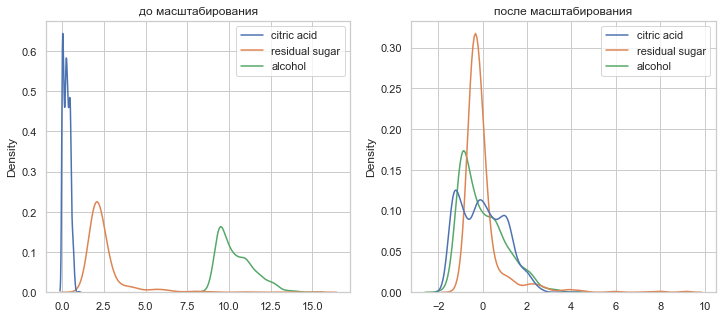

In [10]:
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

# Масштабирование "Mean Normalisation"
x′=x−μ(x)max(x)−min(x)

In [11]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = train_data.mean(axis=0)
        maxs = data.max(axis=0)
        mins = data.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [12]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(data)
data_cs21_scaled.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-2.036277e-16,1.144609e-15,-1.260284e-16,4.019177e-16,-7.763403e-18,1.086399e-17,5.219269e-14,-7.355531e-16,-2.215050e-16,3.940363e-15
std,1.226436e-01,1.948011e-01,9.657042e-02,7.857313e-02,1.473301e-01,1.162400e-01,1.385708e-01,1.215641e-01,1.015012e-01,1.639489e-01
min,-2.793291e-01,-2.709756e-01,-1.122470e-01,-1.259875e-01,-2.095147e-01,-1.429979e-01,-4.902114e-01,-4.496954e-01,-1.964963e-01,-3.112282e-01
25%,-9.439761e-02,-1.809756e-01,-4.375380e-02,-2.915950e-02,-1.250077e-01,-8.646084e-02,-8.419084e-02,-7.961669e-02,-6.475979e-02,-1.419974e-01
50%,-5.356516e-03,-1.097561e-02,-2.320586e-02,-1.413446e-02,-2.641616e-02,-2.992374e-02,2.438198e-04,-8.765321e-04,-2.284362e-02,-3.430509e-02
75%,7.683527e-02,1.490244e-01,4.191404e-03,4.229480e-03,7.217539e-02,5.488192e-02,7.990608e-02,6.998961e-02,4.302464e-02,1.041564e-01
max,7.206709e-01,7.290244e-01,8.877530e-01,8.740125e-01,7.904853e-01,8.570021e-01,5.097886e-01,5.503046e-01,8.035037e-01,6.887718e-01


In [13]:
cs22 = MeanNormalisation()
cs22.fit(train_data)
data_cs22_scaled_train = cs22.transform(train_data)

In [14]:
data_cs22_scaled_train.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-2.036277e-16,1.144609e-15,-1.260284e-16,4.019177e-16,-7.763403e-18,1.086399e-17,5.219269e-14,-7.355531e-16,-2.215050e-16,3.940363e-15
std,1.226436e-01,1.948011e-01,9.657042e-02,7.857313e-02,1.473301e-01,1.162400e-01,1.385708e-01,1.215641e-01,1.015012e-01,1.639489e-01
min,-2.793291e-01,-2.709756e-01,-1.122470e-01,-1.259875e-01,-2.095147e-01,-1.429979e-01,-4.902114e-01,-4.496954e-01,-1.964963e-01,-3.112282e-01
25%,-9.439761e-02,-1.809756e-01,-4.375380e-02,-2.915950e-02,-1.250077e-01,-8.646084e-02,-8.419084e-02,-7.961669e-02,-6.475979e-02,-1.419974e-01
50%,-5.356516e-03,-1.097561e-02,-2.320586e-02,-1.413446e-02,-2.641616e-02,-2.992374e-02,2.438198e-04,-8.765321e-04,-2.284362e-02,-3.430509e-02
75%,7.683527e-02,1.490244e-01,4.191404e-03,4.229480e-03,7.217539e-02,5.488192e-02,7.990608e-02,6.998961e-02,4.302464e-02,1.041564e-01
max,7.206709e-01,7.290244e-01,8.877530e-01,8.740125e-01,7.904853e-01,8.570021e-01,5.097886e-01,5.503046e-01,8.035037e-01,6.887718e-01


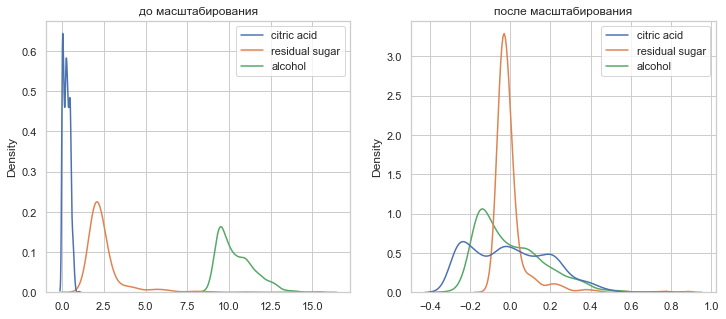

In [15]:
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

# MinMax-масштабирование
x′=x−min(x)max(x)−min(x)

In [16]:
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(data)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.279329,0.270976,0.112247,0.125988,0.209515,0.142998,0.490211,0.449695,0.196496,0.311228
std,0.122644,0.194801,0.096570,0.078573,0.147330,0.116240,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
cs32 = MinMaxScaler()
cs32.fit(train_data)
data_cs32_scaled_train_temp = cs32.transform(train_data)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)

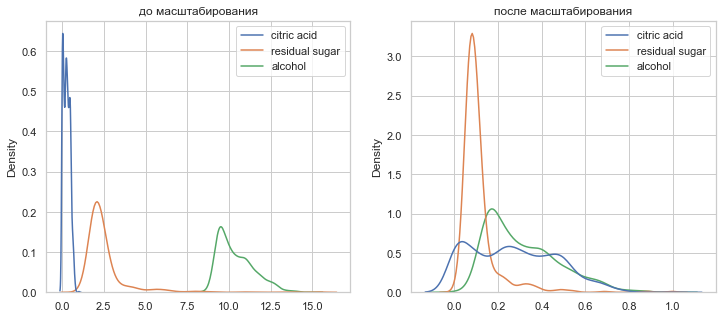

In [18]:
draw_kde(['citric acid', 'residual sugar', 'alcohol'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')


# Обработка выбросов

In [19]:
x_col_list = ['citric acid', 'residual sugar', 'alcohol']

In [20]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

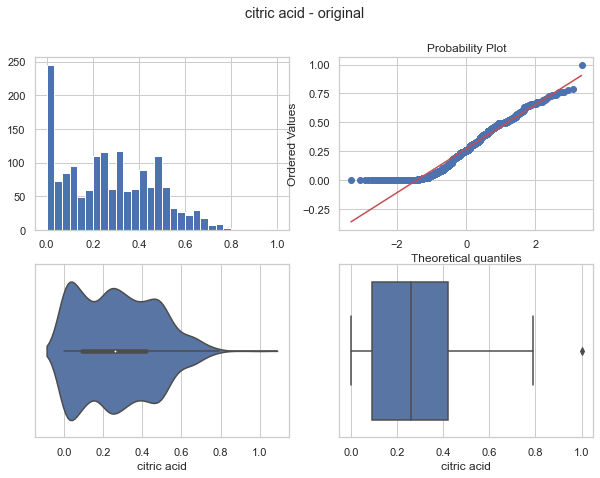

In [21]:
diagnostic_plots(data, 'citric acid', 'citric acid - original')

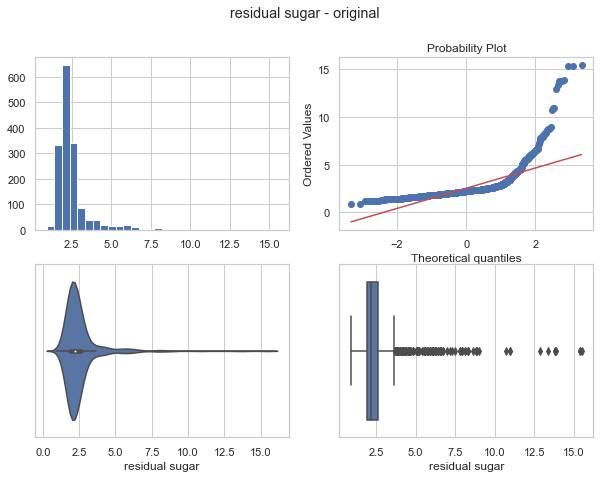

In [22]:
diagnostic_plots(data, 'residual sugar', 'residual sugar - original')

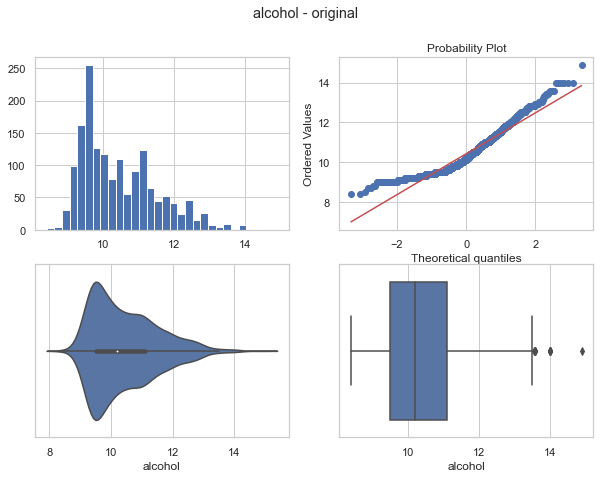

In [23]:
diagnostic_plots(data, 'alcohol', 'alcohol - original')

In [24]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [25]:
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary    

# Удаление выбросов

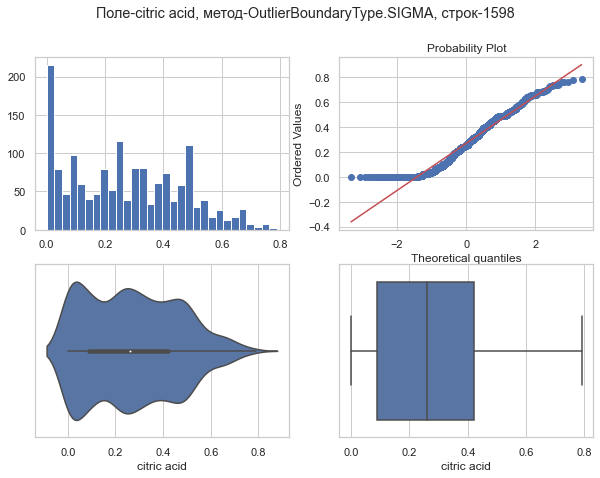

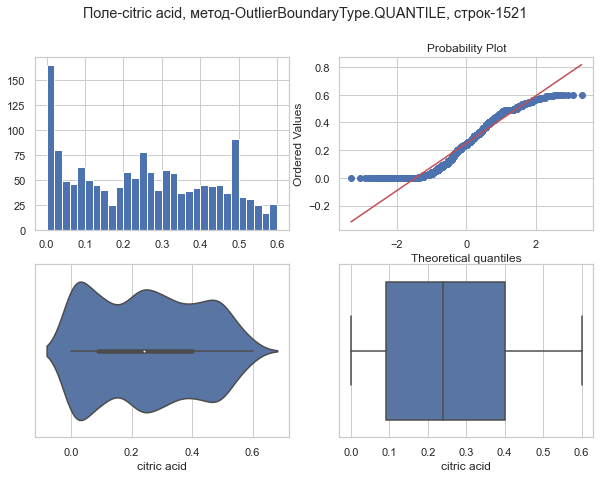

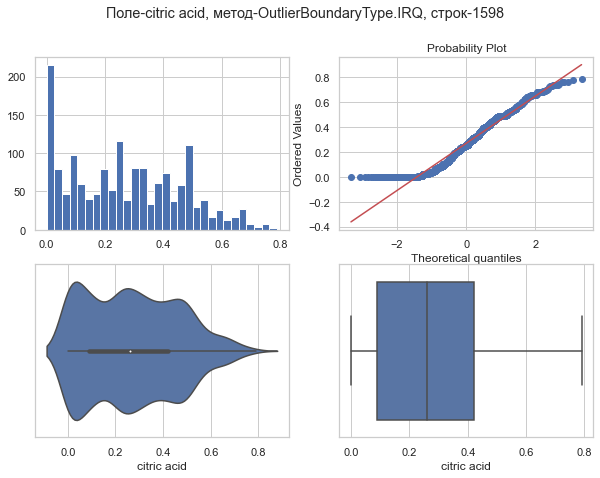

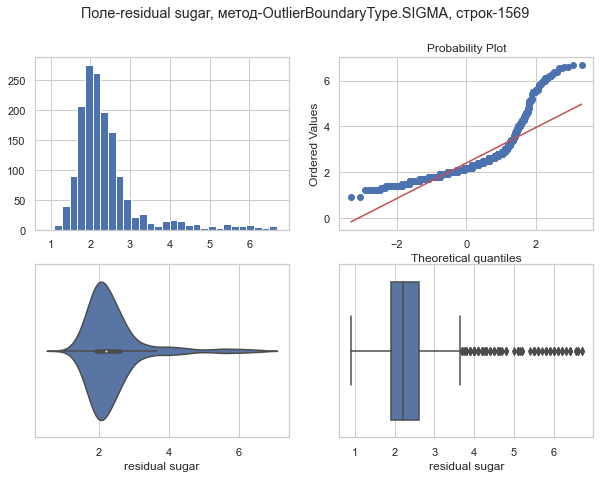

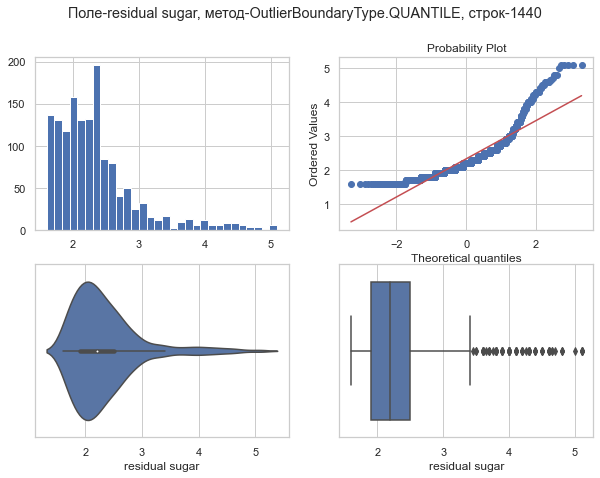

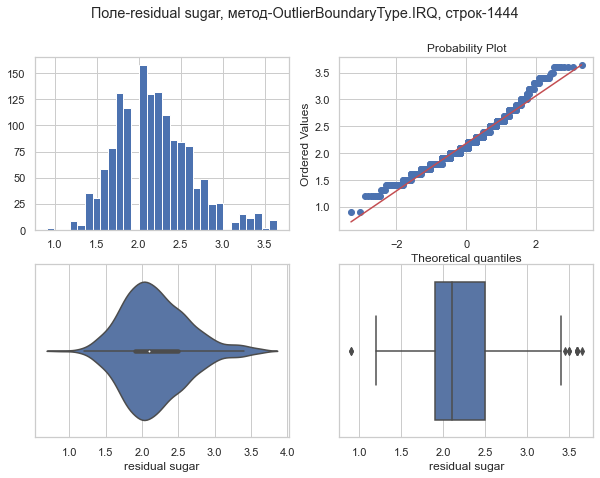

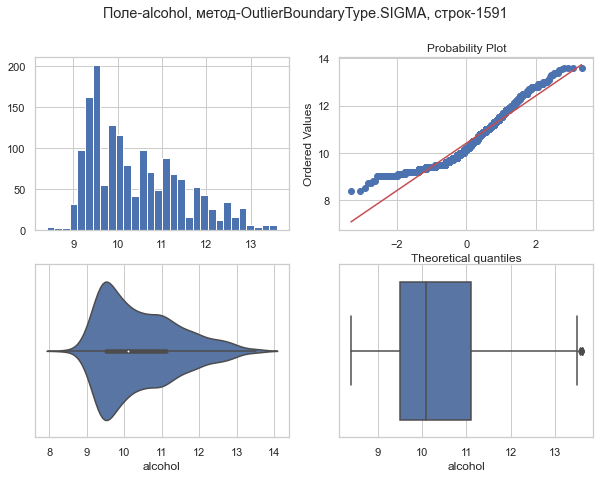

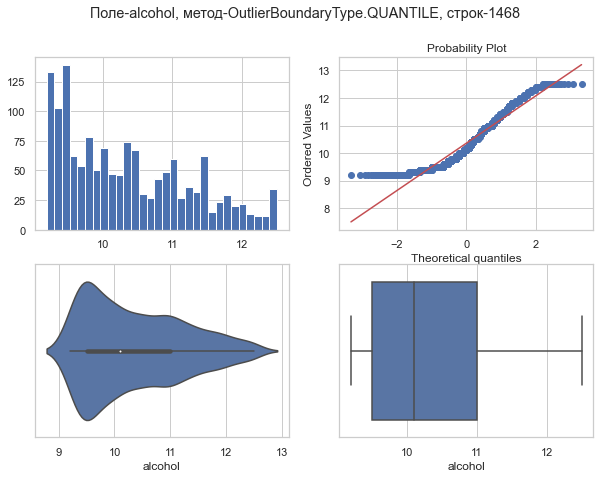

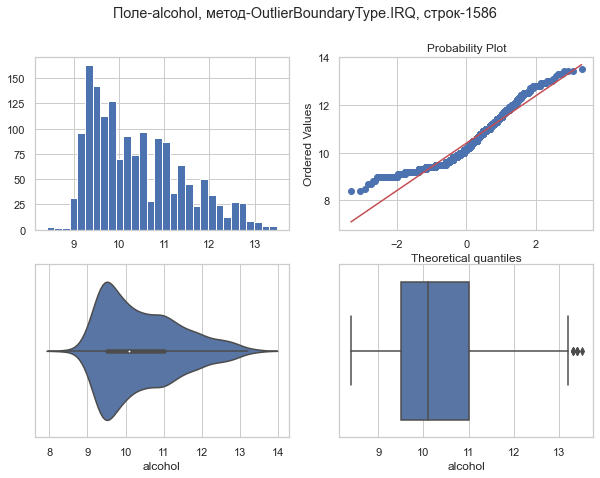

In [26]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

# Замена выбросов

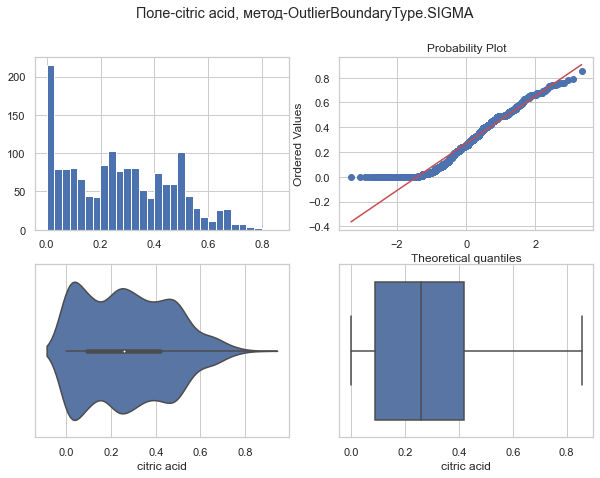

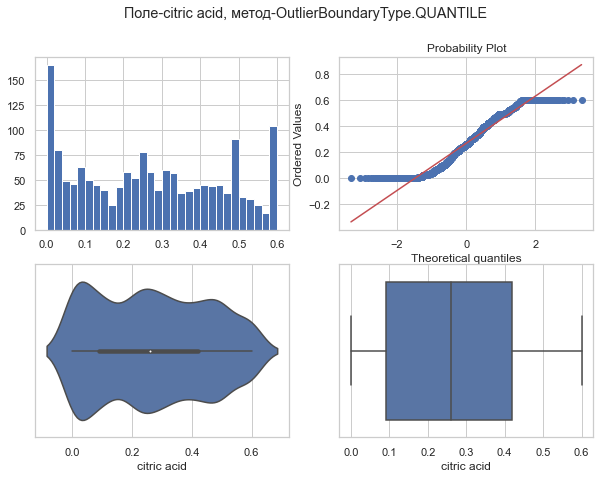

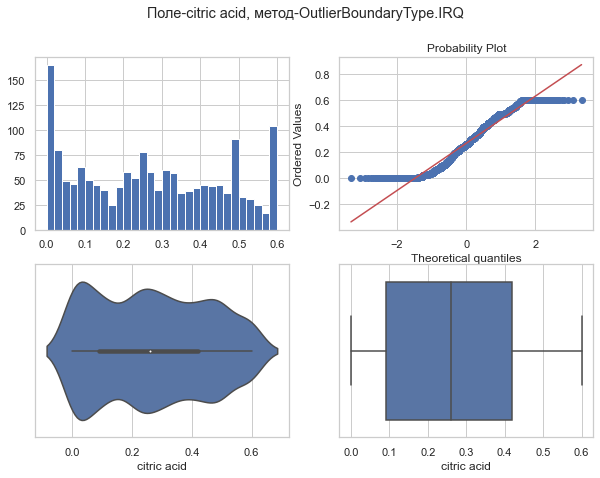

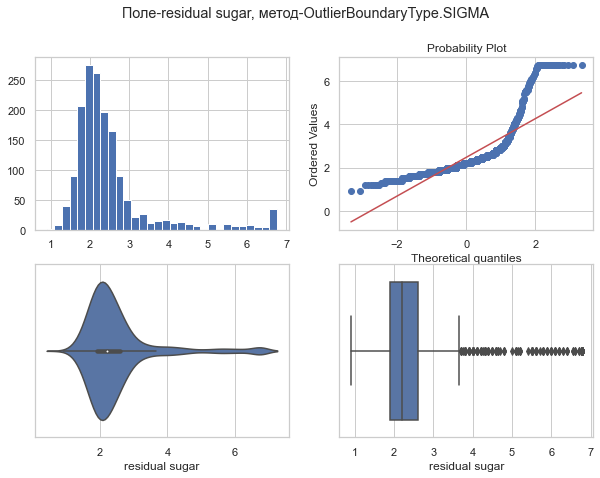

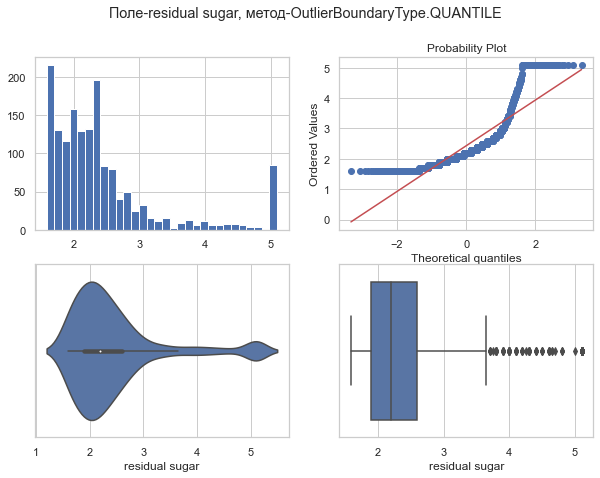

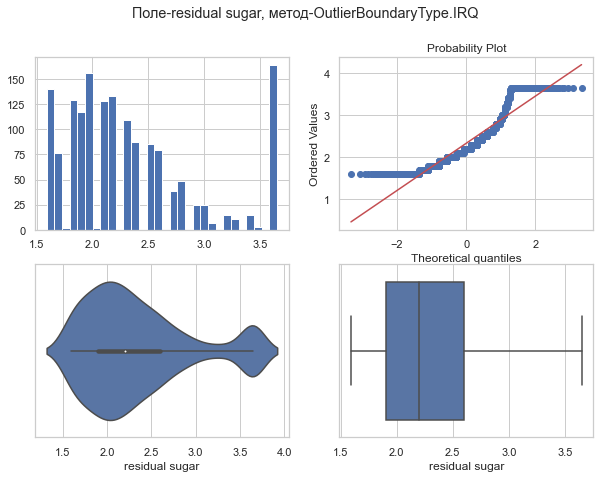

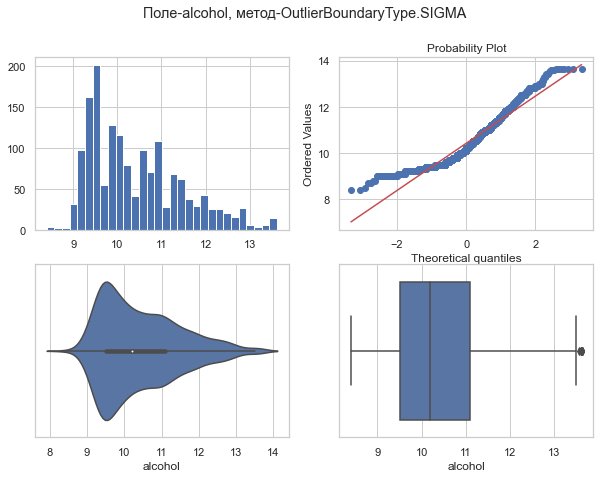

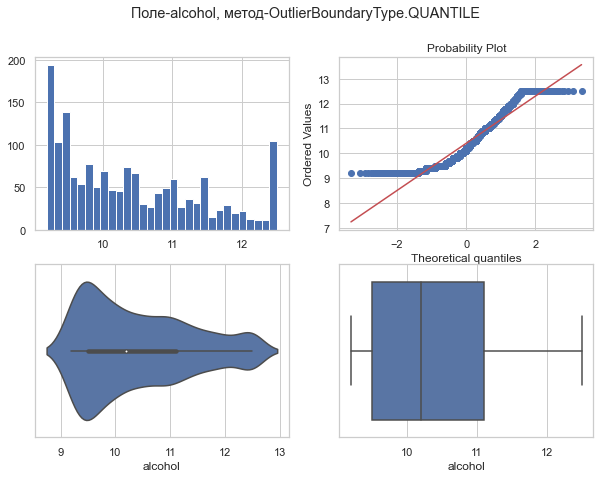

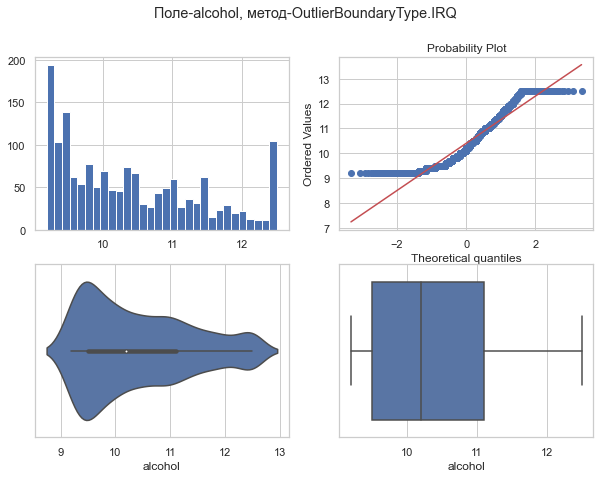

In [27]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

#  Feature selection

# Методы фильтрации (filter methods)

In [28]:
lst_arr_1211 = [[1,2,1,21], [1,2,2,22], [1,2,3,23], [1,2,4,24], 
                [1,2,5,25], [1,2,6,26], [1,2,7,27], [1,1,8,28]]
arr_1211 = np.array(lst_arr_1211)
data_1211 = pd.DataFrame(arr_1211, columns=['f1', 'f2', 'f3', 'f4'])
data_1211

,f1,f2,f3,f4
0,1,2,1,21
1,1,2,2,22
2,1,2,3,23
3,1,2,4,24
4,1,2,5,25
5,1,2,6,26
6,1,2,7,27
7,1,1,8,28


In [29]:
selector_1211 = VarianceThreshold(threshold=0.15)
selector_1211.fit(data_1211)
# Значения дисперсий для каждого признака
selector_1211.variances_

array([0.      , 0.109375, 5.25    , 5.25    ])

In [30]:
selector_1211.transform(data_1211)

array([[ 1, 21],
       [ 2, 22],
       [ 3, 23],
       [ 4, 24],
       [ 5, 25],
       [ 6, 26],
       [ 7, 27],
       [ 8, 28]])

In [31]:
lst_arr_1212 = [[21,1,2,21,1,3,21], 
                [22,2,2,22,2,3,22], 
                [23,3,2,23,3,3,23], 
                [24,4,2,24,4,3,24]]
arr_1212 = np.array(lst_arr_1212)
data_1212 = pd.DataFrame(arr_1212, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'])
data_1212

,f1,f2,f3,f4,f5,f6,f7
0,21,1,2,21,1,3,21
1,22,2,2,22,2,3,22
2,23,3,2,23,3,3,23
3,24,4,2,24,4,3,24


In [32]:
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    
    pairs = {}
    dups = []

    # Перебор всех колонок (внешний)
    for i in range(X.shape[1]):

        # текущая колонка
        feat_outer = X.columns[i]

        # если текущая колонка не является дублем
        if feat_outer not in dups:

            # создаем запись в словаре, колонка является ключом
            pairs[feat_outer] = []

            # Перебор оставшихся колонок (внутренний)
            for feat_inner in X.columns[i + 1:]:

                # Если колонки идентичны
                if X[feat_outer].equals(X[feat_inner]):

                    # добавление в словарь и список дубликатов
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)

    return pairs

In [33]:
get_duplicates(data_1212)

{'f1': ['f4', 'f7'], 'f2': ['f5'], 'f3': [], 'f6': []}

<AxesSubplot:>

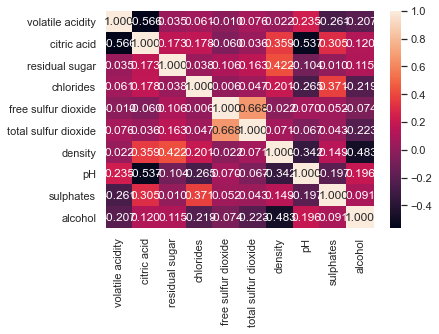

In [34]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [35]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [36]:
make_corr_df(data)

,f1,f2,corr


In [37]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [38]:
corr_groups(make_corr_df(data))

[]

Text(0, 0.5, 'Взаимная информация')

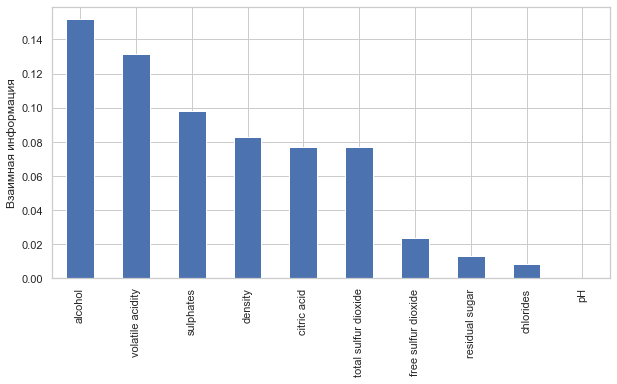

In [39]:
mi = mutual_info_regression(data, train_y)
mi = pd.Series(mi)
mi.index = features
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [40]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(data, train_y)

list(zip(features, sel_mi.get_support()))

[('volatile acidity', True),
 ('citric acid', False),
 ('residual sugar', False),
 ('chlorides', False),
 ('free sulfur dioxide', False),
 ('total sulfur dioxide', True),
 ('density', True),
 ('pH', False),
 ('sulphates', True),
 ('alcohol', True)]

In [41]:
features[sel_mi.get_support()]

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')